In [15]:
%matplotlib inline

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from numpy import mean
from math import sqrt,acos,cos,sin,pi,exp,log,isnan,atan2
from numpy import asarray
from matplotlib import gridspec
from scipy import stats,signal
from textwrap import wrap
import seaborn as sns

from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

from DetSysScripts import distVar, FullCov

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

Hello! I made this so anyone could easily and rapidly make a bunch of detector systematic covariance matrices for the nues and numus. It should be super simple to use.

In [2]:
# First, load up the detector systematic fun pack
# I've stored this on the uboone gpvms here: /uboone/app/users/dcianci/DLLEE/SystematicStuff/detsyspackFULL_jul9.pickle
# It's a little big, but it's all you'll need

covpack = FullCov('detsyspackFULL_jul9.pickle')

In [3]:
# Now, we define the variables we want to use. I made a class for this for convenience so i could switch variables out and not have to keep remembering the different ranges.

# structure is distVar([name of variable as it appears in FVV],[variable range],[more detailed label for plots])
myvariable = distVar('Xreco',(15,241.25),'Reco Vertex X')

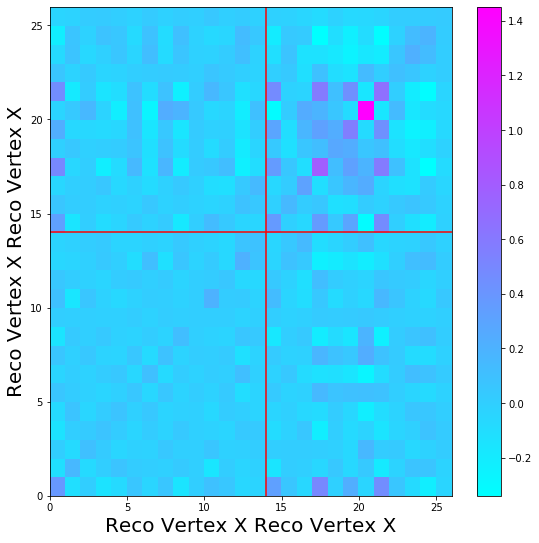

In [5]:
# Now, we can just make the dang thing!

# structure is [type of matrix]([numu distVar],[nue distVar],([#bins numu],[#bins nue]),[want to draw the matrix, too?])
# all matrix functions return a numu_bins+nue_bins x numu_bins+nue_bins numpy matrix
# as for matrix types, we've got 'Nominal','Flat' and 'Polyfit'

cov = covpack.Nominal(myvariable,myvariable,(14,12),True) 

#if you want to save this matrix somewhere, just
#np.save('covariance matrix name', cov)

In [7]:
# Rad! But which systematics are even included in that?

covpack.ListDetectorSystematics()

Detector Systematics: ['wiremodX', 'wiremodYZ', 'wiremoddEdx', 'LYdown', 'wiremodThetaYZ', 'wiremodThetaXZ']
Enabled: [1. 1. 1. 1. 1. 1.]


In [11]:
# And it looks like they're all enabled. Let's say we want to cut one, we feed in a list of ones and zeros where 1 means enable and 0 means disable, which correspond to each matrix
# Systematic ordering matches the given list.

#for example:
covpack.EnableDetectorSystematics([1,0,0,0,0,1])

wiremodX is enabled
wiremodThetaXZ is enabled
Enabled: [1, 0, 0, 0, 0, 1]


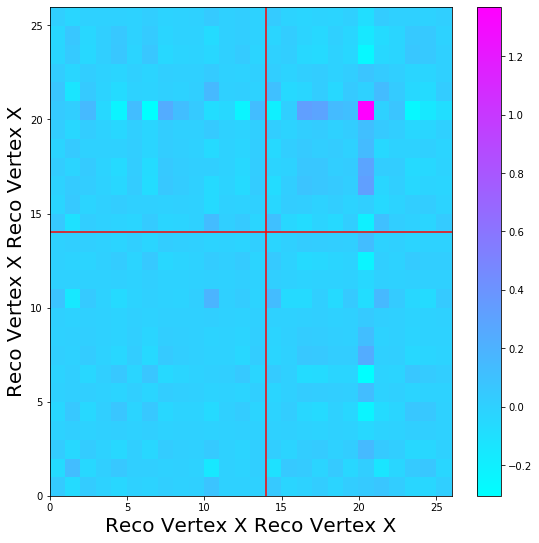

In [13]:
# Now if we make the matrix again, whoah! different!

cov = covpack.Nominal(myvariable,myvariable,(14,12),True) 

wiremodX
polyfit degrees: 0 26.32942008972168
Chisq/(10 dof) [CV vs Nominal Variation]:2.937
Chisq/(10 dof) [CV vs Polyfit Variation]:0.377
wiremodYZ
polyfit degrees: 0 6.340070009231567
Chisq/(10 dof) [CV vs Nominal Variation]:0.409
Chisq/(10 dof) [CV vs Polyfit Variation]:0.016
wiremoddEdx
polyfit degrees: 1 15.576056344168526
Chisq/(10 dof) [CV vs Nominal Variation]:1.901
Chisq/(10 dof) [CV vs Polyfit Variation]:0.741
LYdown
polyfit degrees: 0 7.151113510131836
Chisq/(10 dof) [CV vs Nominal Variation]:0.470
Chisq/(10 dof) [CV vs Polyfit Variation]:0.037
wiremodThetaYZ
polyfit degrees: 0 16.872212409973145
Chisq/(10 dof) [CV vs Nominal Variation]:1.444
Chisq/(10 dof) [CV vs Polyfit Variation]:0.005
wiremodThetaXZ
polyfit degrees: 0 12.59448528289795
Chisq/(10 dof) [CV vs Nominal Variation]:1.036
Chisq/(10 dof) [CV vs Polyfit Variation]:0.048


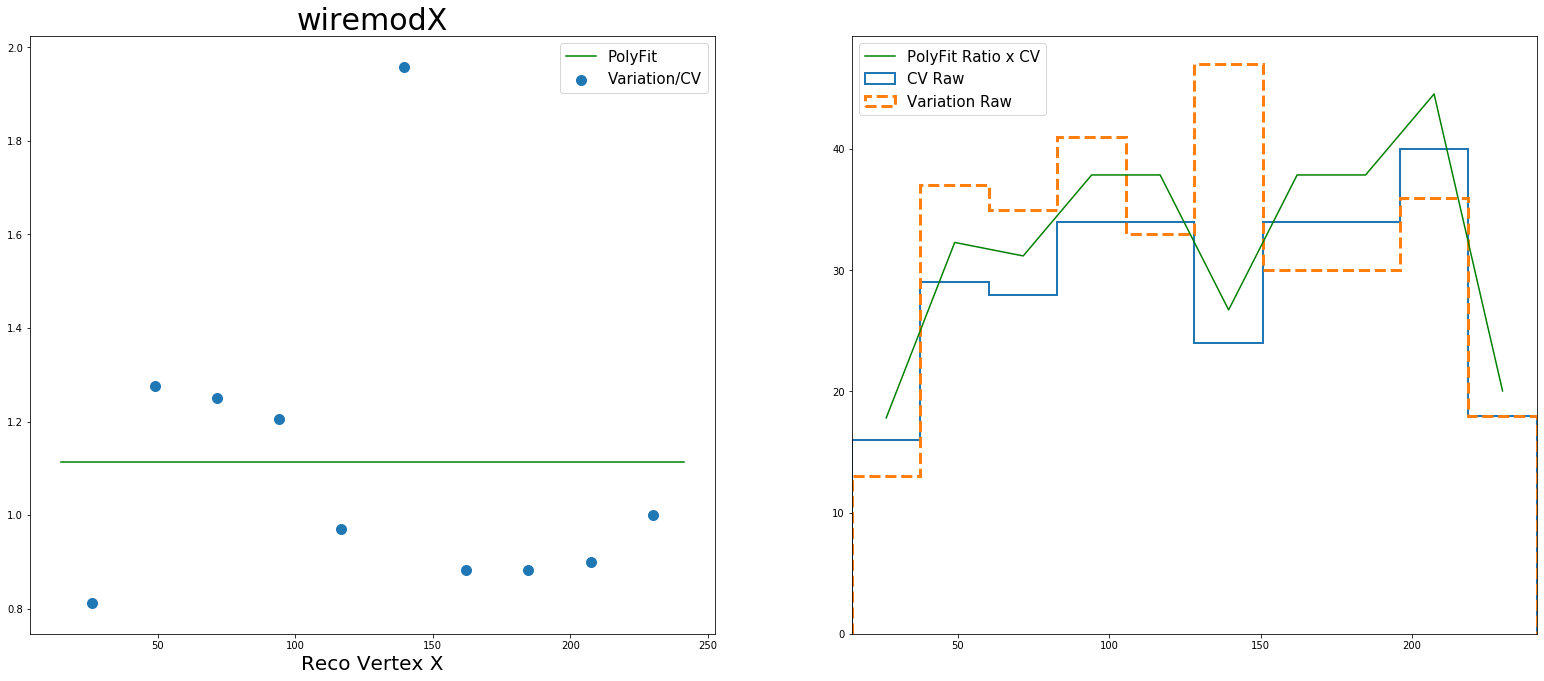

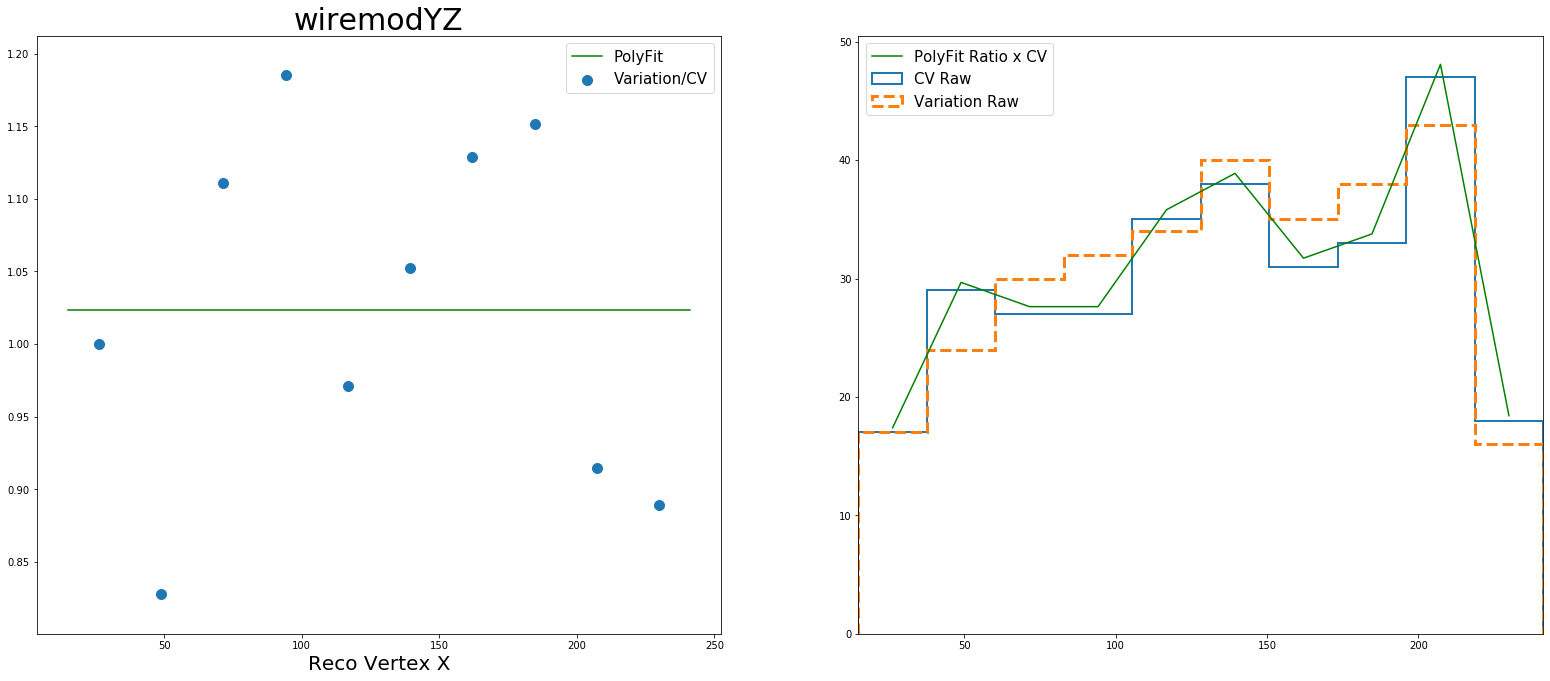

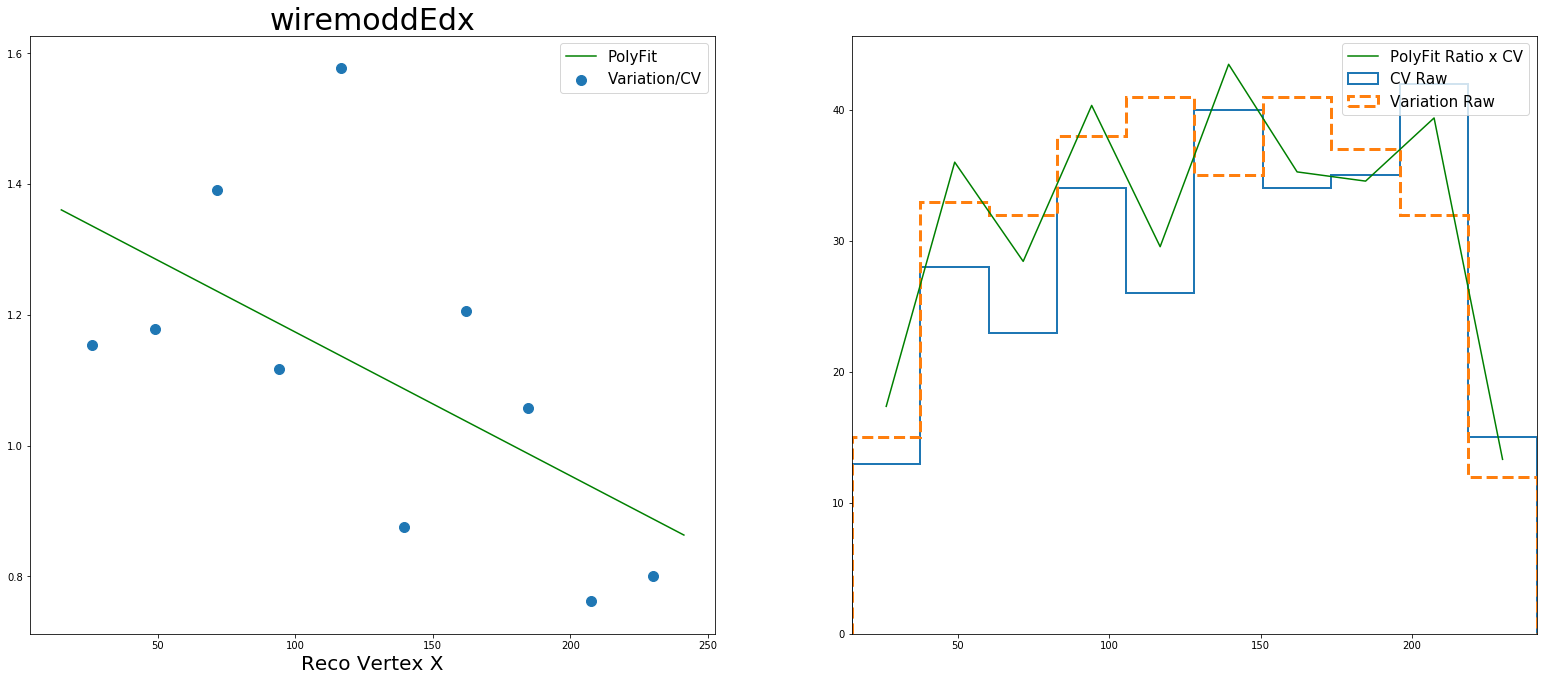

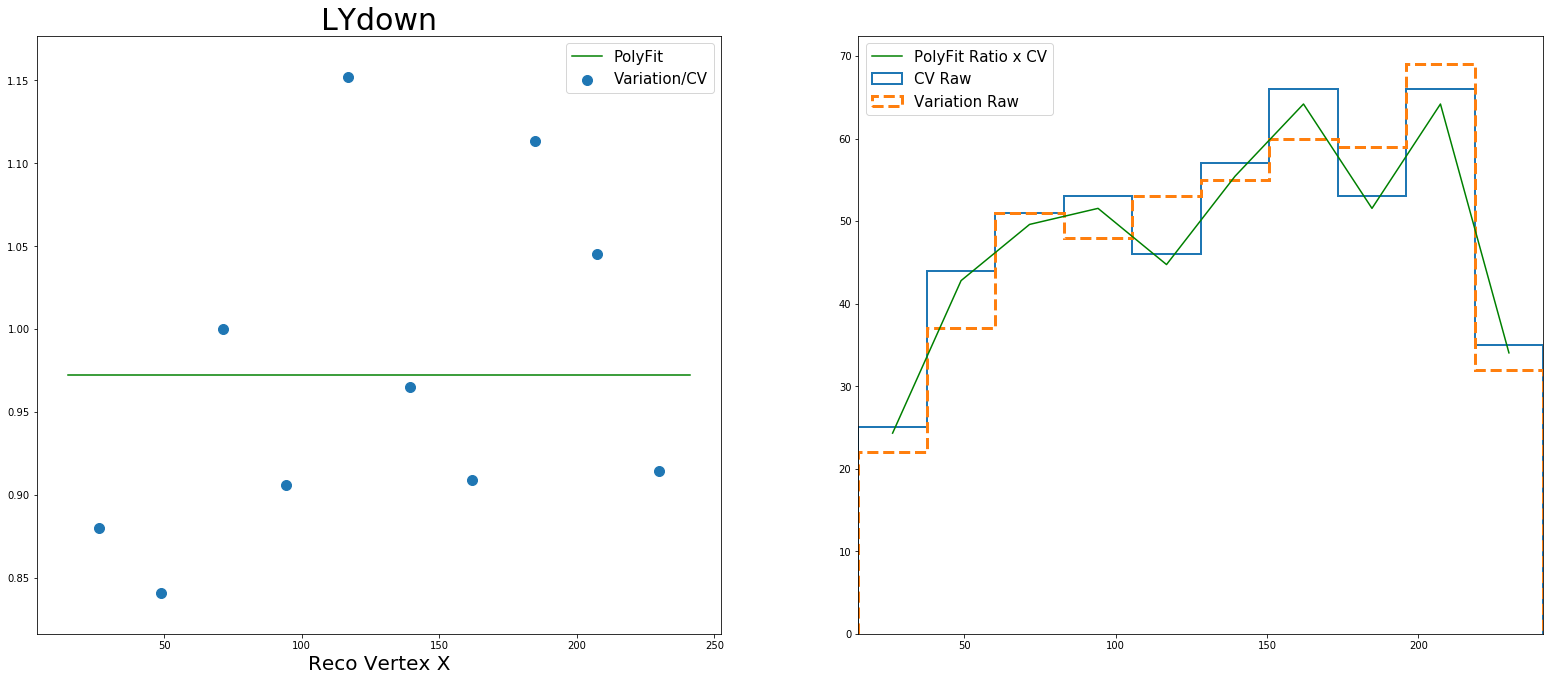

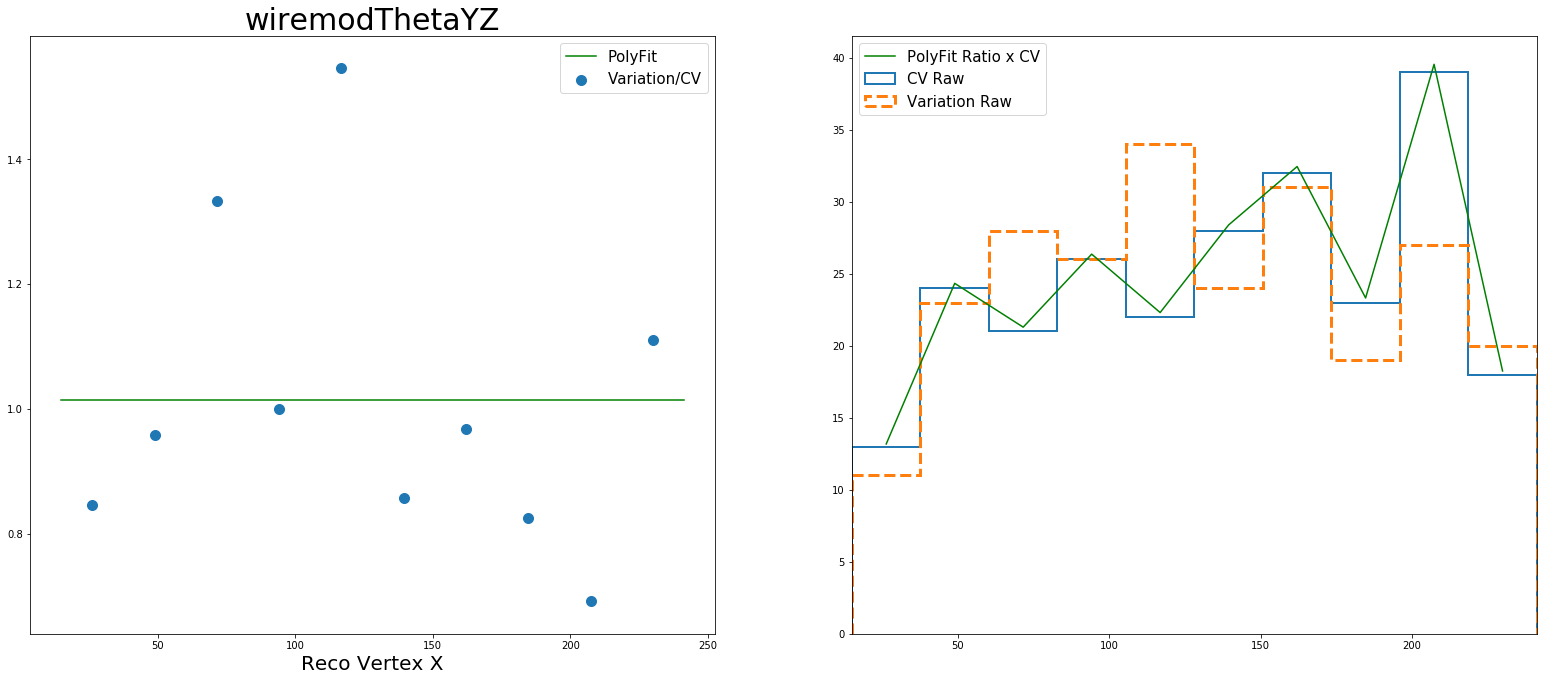

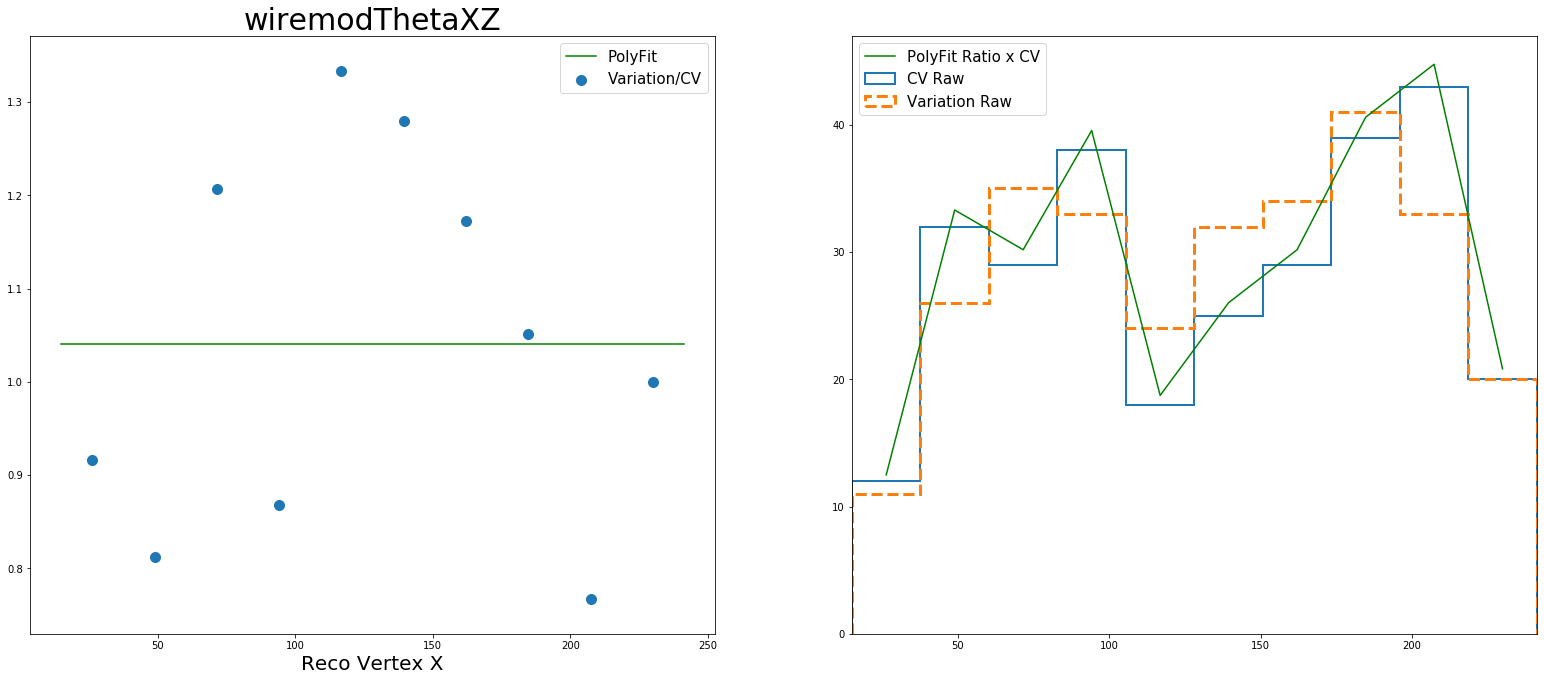

In [14]:
# Lastly, let's say you want to know specific details about what individual detector systematics look like for numus or nues. Well, you can do that, too.


# structure is ([variable],[#bins])
covpack.DetectorSystematicDiagnosticsNue(myvariable,10)

#and you can replace Nue with Numu to get those instead.
#Below, you'll see, for each variation:
# - plots of the ratio and histograms with polyfit overlaid
# - the number of degrees that best suited the fit determined by the AIC parameter
# - the chi2/dof between the CV and the Variations in the histogram to the right.